In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [98]:
df=pd.read_csv("SpotifyFeatures.csv")

In [99]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [100]:
df.drop(df.columns[[0,3,5,7,9,10,-5,-4,-3,-2]],1,inplace=True)

<ipython-input-100-e9a48e9d6de2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns[[0,3,5,7,9,10,-5,-4,-3,-2]],1,inplace=True)


In [101]:
df

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,valence
0,Henri Salvador,C'est beau de faire un Show,0,0.389,0.910,0.3460,-1.828,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.590,0.737,0.1510,-5.559,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.663,0.131,0.1030,-13.879,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.240,0.326,0.0985,-12.178,0.227
4,Fabien Nataf,Ouverture,4,0.331,0.225,0.2020,-21.150,0.390
...,...,...,...,...,...,...,...,...
143323,DaniLeigh,Be Yourself,53,0.781,0.366,0.1020,-9.067,0.321
143324,The Marías,Déjate Llevar,47,0.534,0.552,0.0855,-9.813,0.508
143325,NEEDTOBREATHE,State I'm In (Acoustic Live),50,0.500,0.926,0.7050,-4.495,0.275
143326,Madaila,The Dance,44,0.562,0.540,0.1170,-7.525,0.298


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143328 entries, 0 to 143327
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   artist_name   143328 non-null  object 
 1   track_name    143328 non-null  object 
 2   popularity    143328 non-null  int64  
 3   danceability  143328 non-null  float64
 4   energy        143328 non-null  float64
 5   liveness      143328 non-null  float64
 6   loudness      143328 non-null  float64
 7   valence       143327 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 8.7+ MB


In [103]:
df.isnull().sum()

artist_name     0
track_name      0
popularity      0
danceability    0
energy          0
liveness        0
loudness        0
valence         1
dtype: int64

In [104]:
df["valence"]=df["valence"].fillna(df["valence"].mean())

In [105]:
df.describe()

,popularity,danceability,energy,liveness,loudness,valence
count,143328.000000,143328.000000,143328.000000,143328.000000,143328.000000,143328.000000
mean,42.879640,0.568488,0.573353,0.192739,-9.203816,0.456737
std,19.148767,0.185047,0.260951,0.161445,5.966202,0.252731
min,0.000000,0.058200,0.000020,0.009670,-47.599000,0.000000
25%,31.000000,0.447000,0.396000,0.096400,-11.036250,0.250000
50%,47.000000,0.584000,0.609000,0.126000,-7.394500,0.444000
75%,56.000000,0.707000,0.784000,0.239000,-5.312000,0.653000
max,100.000000,0.989000,0.999000,1.000000,3.744000,1.000000


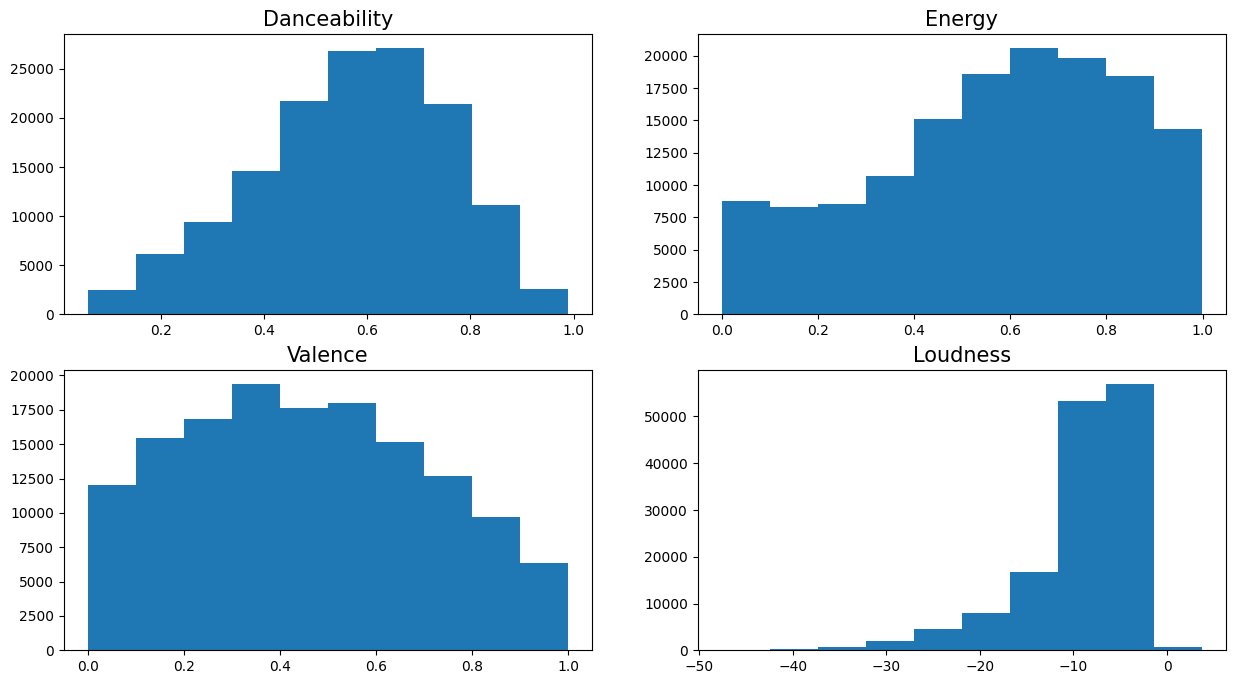

In [106]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [108]:
col_features = df.columns[2:]
X = MinMaxScaler().fit_transform(df[col_features])

In [109]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, 'Songs Clustered')

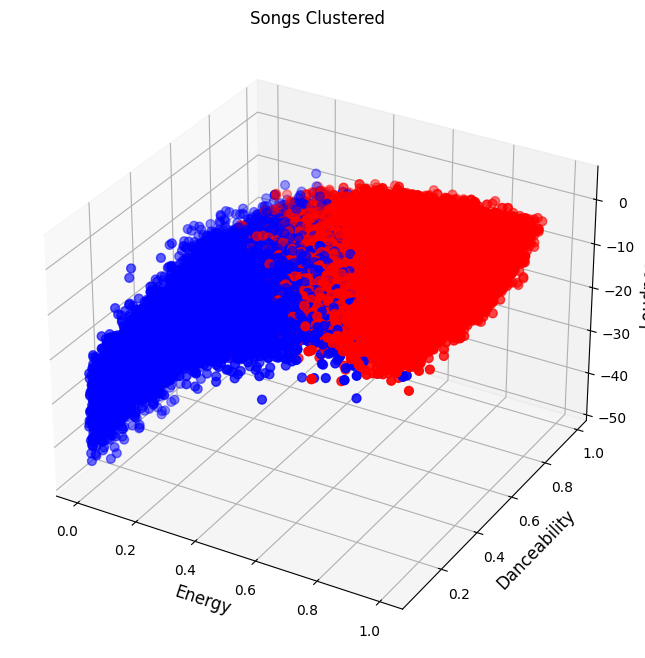

In [111]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("Songs Clustered")

In [112]:
df.groupby(['kmeans']).mean()

<ipython-input-112-395195fd462d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['kmeans']).mean()


,popularity,danceability,energy,liveness,loudness,valence
kmeans,,,,,,
0,30.332367,0.400360,0.241860,0.174837,-16.145769,0.226383
1,47.342786,0.628292,0.691267,0.199107,-6.734518,0.538676


In [113]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [114]:
df

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,valence,kmeans
0,Henri Salvador,C'est beau de faire un Show,0,0.389,0.910,0.3460,-1.828,0.814000,1
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.590,0.737,0.1510,-5.559,0.816000,1
2,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.663,0.131,0.1030,-13.879,0.368000,0
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.240,0.326,0.0985,-12.178,0.227000,0
4,Fabien Nataf,Ouverture,4,0.331,0.225,0.2020,-21.150,0.390000,0
...,...,...,...,...,...,...,...,...,...
143323,DaniLeigh,Be Yourself,53,0.781,0.366,0.1020,-9.067,0.321000,1
143324,The Marías,Déjate Llevar,47,0.534,0.552,0.0855,-9.813,0.508000,1
143325,NEEDTOBREATHE,State I'm In (Acoustic Live),50,0.500,0.926,0.7050,-4.495,0.275000,1
143326,Madaila,The Dance,44,0.562,0.540,0.1170,-7.525,0.298000,1


In [ ]:
## reshape(-1, 1) kodu bir dizi veya numpy dizisini yeniden şekillendirirken kullanılır. Bu kod, verilen diziyi sütun vektörüne dönüştürmek için kullanılır.